In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [2]:
# Quick overview of datasets
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [3]:
# Merging data for combined analysis
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


In [4]:
# Convert TransactionDate to datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

Top Customers by Transaction Value: Bar chart to show the top 10 customers contributing the most.

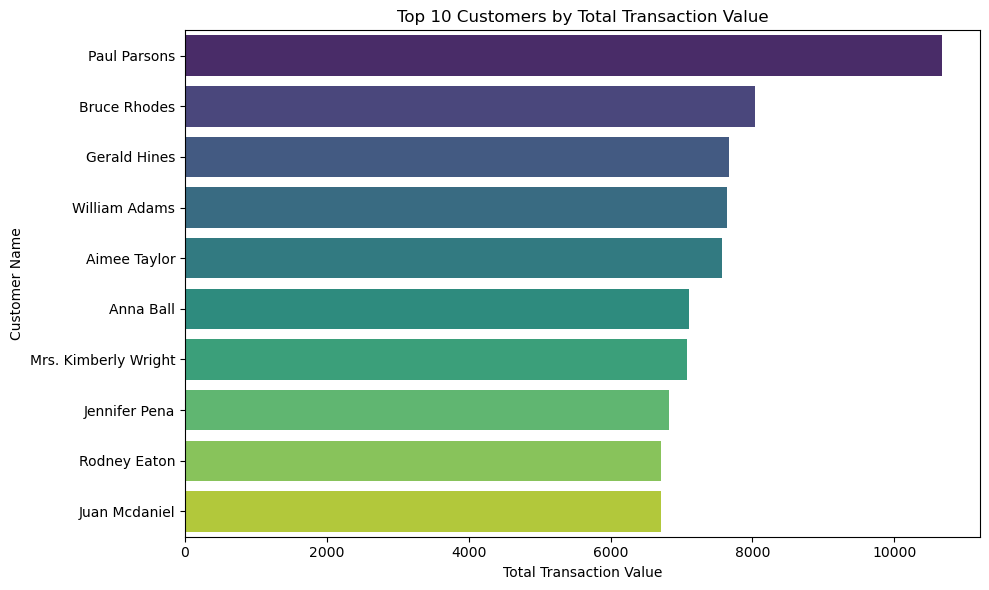

In [5]:
# 1. **Top Customers by Total Transaction Value**
top_customers = data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="viridis")
plt.title("Top 10 Customers by Total Transaction Value")
plt.xlabel("Total Transaction Value")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()

Sales by Product Category: Bar chart to display sales for each product category.

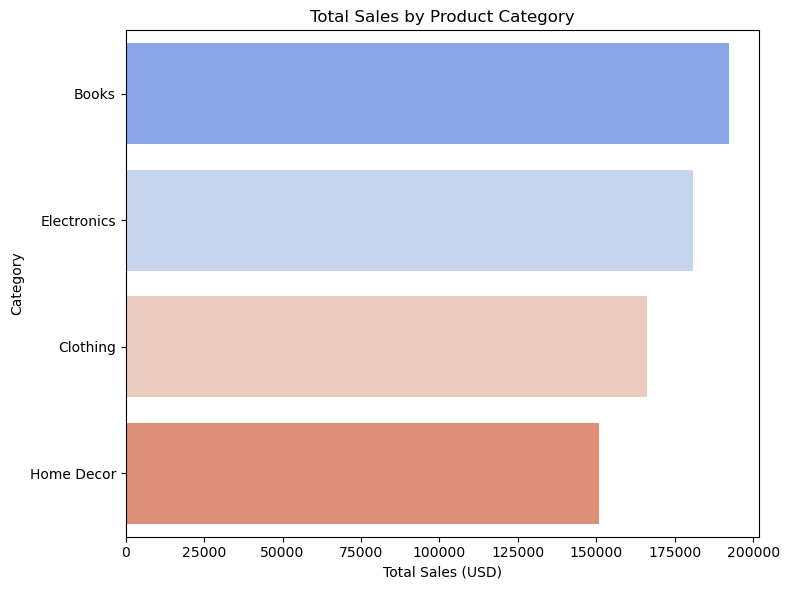

In [6]:
# 2. **Sales Distribution by Product Category**
sales_by_category = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette="coolwarm")
plt.title("Total Sales by Product Category")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

Transactions Over Time: Line chart showing sales trends over time

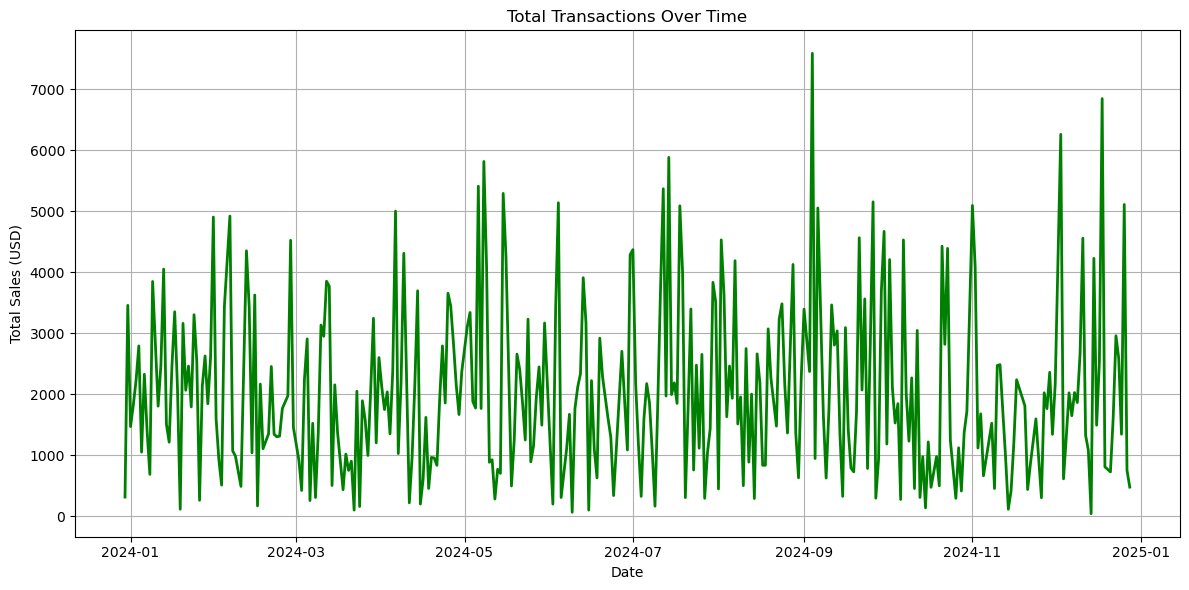

In [7]:

# 3. **Transactions Over Time**
transactions_over_time = data.groupby(data['TransactionDate'].dt.date)['TotalValue'].sum()
plt.figure(figsize=(12, 6))
transactions_over_time.plot(color='green', linewidth=2)
plt.title("Total Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales (USD)")
plt.grid()
plt.tight_layout()
plt.show()


Customer Distribution by Region: Pie chart highlighting customer proportions across regions.

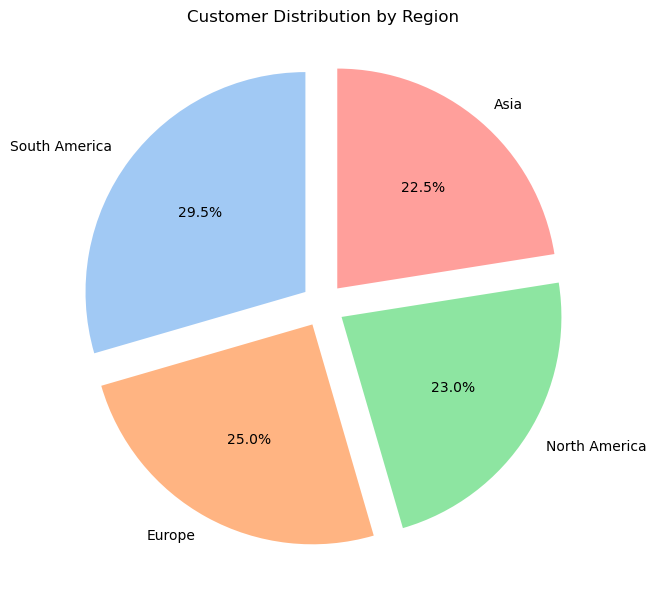

In [8]:
# 4. **Region-wise Customer Distribution**
customer_distribution = customers['Region'].value_counts()
plt.figure(figsize=(8, 6))
customer_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90, explode=[0.1]*len(customer_distribution))
plt.title("Customer Distribution by Region")
plt.ylabel("")
plt.tight_layout()
plt.show()

Top 10 Products: Bar chart indicating the most frequently purchased products.

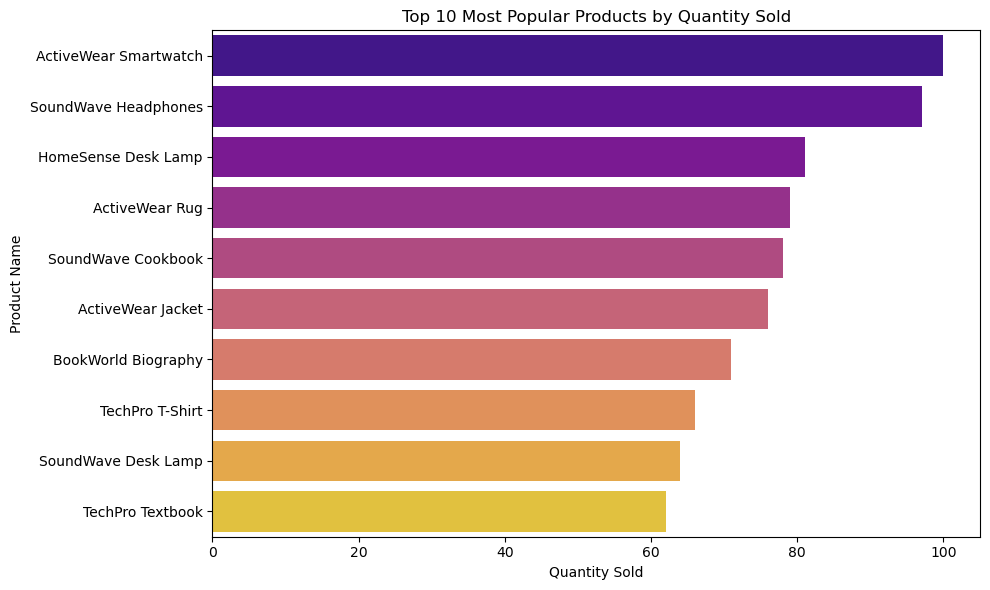

In [9]:
# 5. **Most Popular Products**
popular_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_products.values, y=popular_products.index, palette="plasma")
plt.title("Top 10 Most Popular Products by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


Sales by Region and Category: Heatmap showcasing how different product categories perform in various regions.

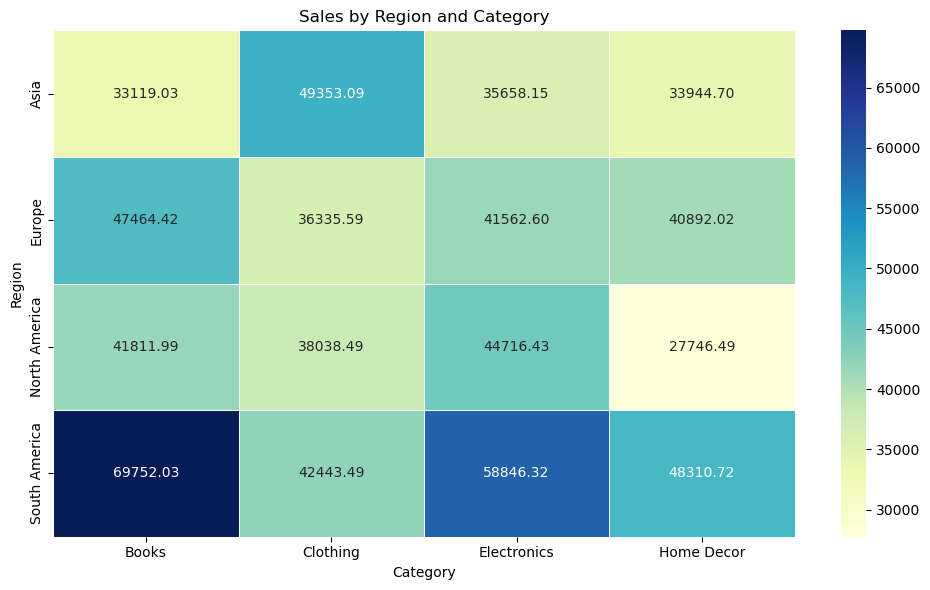

In [10]:
# 6. **Heatmap of Sales by Region and Category**
region_category_sales = data.pivot_table(index='Region', columns='Category', values='TotalValue', aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(region_category_sales, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title("Sales by Region and Category")
plt.xlabel("Category")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

 Customer Signup Trend
This chart shows when most customers signed up, which helps identify periods of successful acquisition campaigns or market trends.

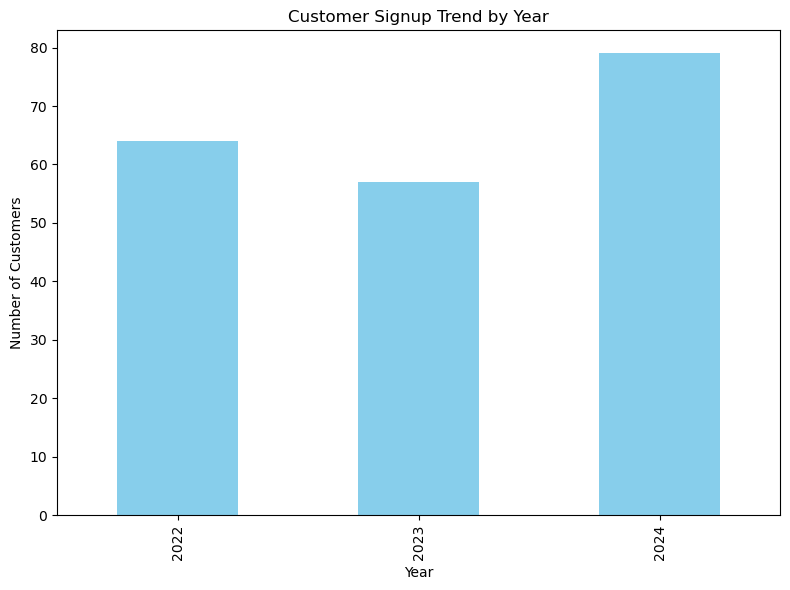

In [11]:
# 7. Analyze customer signup trends
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trend = customers['SignupDate'].dt.year.value_counts().sort_index()

plt.figure(figsize=(8, 6))
signup_trend.plot(kind='bar', color='skyblue')
plt.title("Customer Signup Trend by Year")
plt.xlabel("Year")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


 Average Transaction Value by Region
Understanding average transaction value (ATV) by region can guide regional marketing strategies.

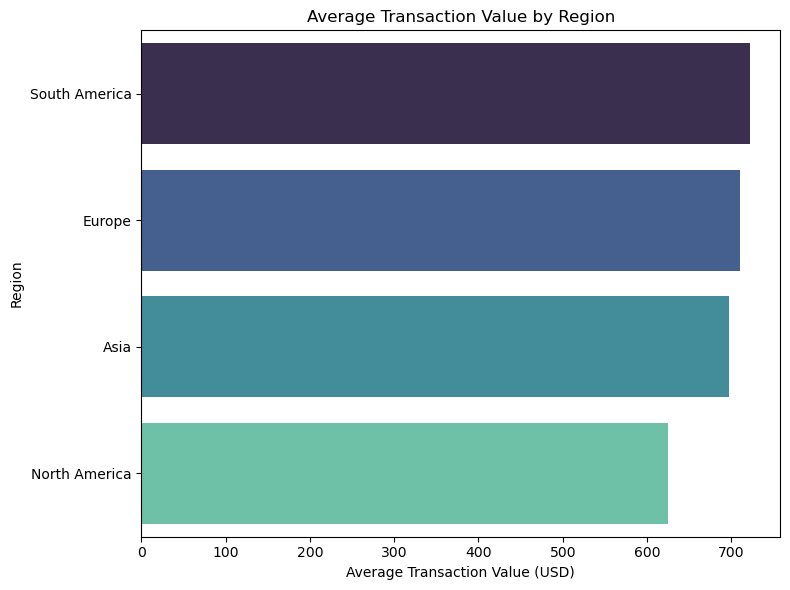

In [12]:
# Average transaction value by region
avg_transaction_value = data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_transaction_value.values, y=avg_transaction_value.index, palette="mako")
plt.title("Average Transaction Value by Region")
plt.xlabel("Average Transaction Value (USD)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


 Customer Lifetime Value (CLV)
Calculate and visualize CLV to identify high-value customers.

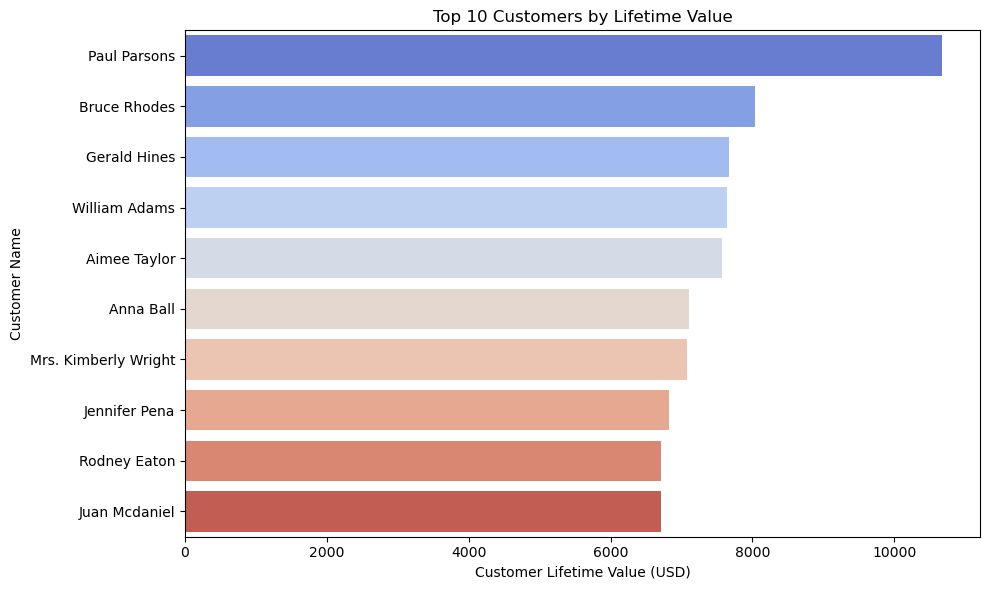

In [13]:
# Calculate Customer Lifetime Value (CLV)
clv = data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=clv.values, y=clv.index, palette="coolwarm")
plt.title("Top 10 Customers by Lifetime Value")
plt.xlabel("Customer Lifetime Value (USD)")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()
